# Imports

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exporting Data

In [73]:
# Specify the path to your Excel file
file_path = '../docus/Assist TBD _ iZcy in TBD.xlsx'

# Read the Excel file
df_trans_all = pd.read_excel(file_path, sheet_name='Transactions_All')
df_trans_id = pd.read_excel(file_path, sheet_name='Transactions_Id')
df_cust_w_profile = pd.read_excel(file_path, sheet_name='Customers_with_Profile')
df_books_create = pd.read_excel(file_path, sheet_name='Books_Create')
df_books_update = pd.read_excel(file_path, sheet_name='Books_Update')
df_books_delete = pd.read_excel(file_path, sheet_name='Books_Delete')

# Combine all the DataFrames into one dictionary
dfs = [{
  'name': 'Transactions All',
  'df': df_trans_all
}, {
  'name': 'Transactions Id',
  'df': df_trans_id
}, {
  'name': 'Customers with Profile',
  'df': df_cust_w_profile
}, {
  'name': 'Books Create',
  'df': df_books_create
}, {
  'name': 'Books Update',
  'df': df_books_update
}, {
  'name': 'Books Delete',
  'df': df_books_delete
}]

# Plotting the Data

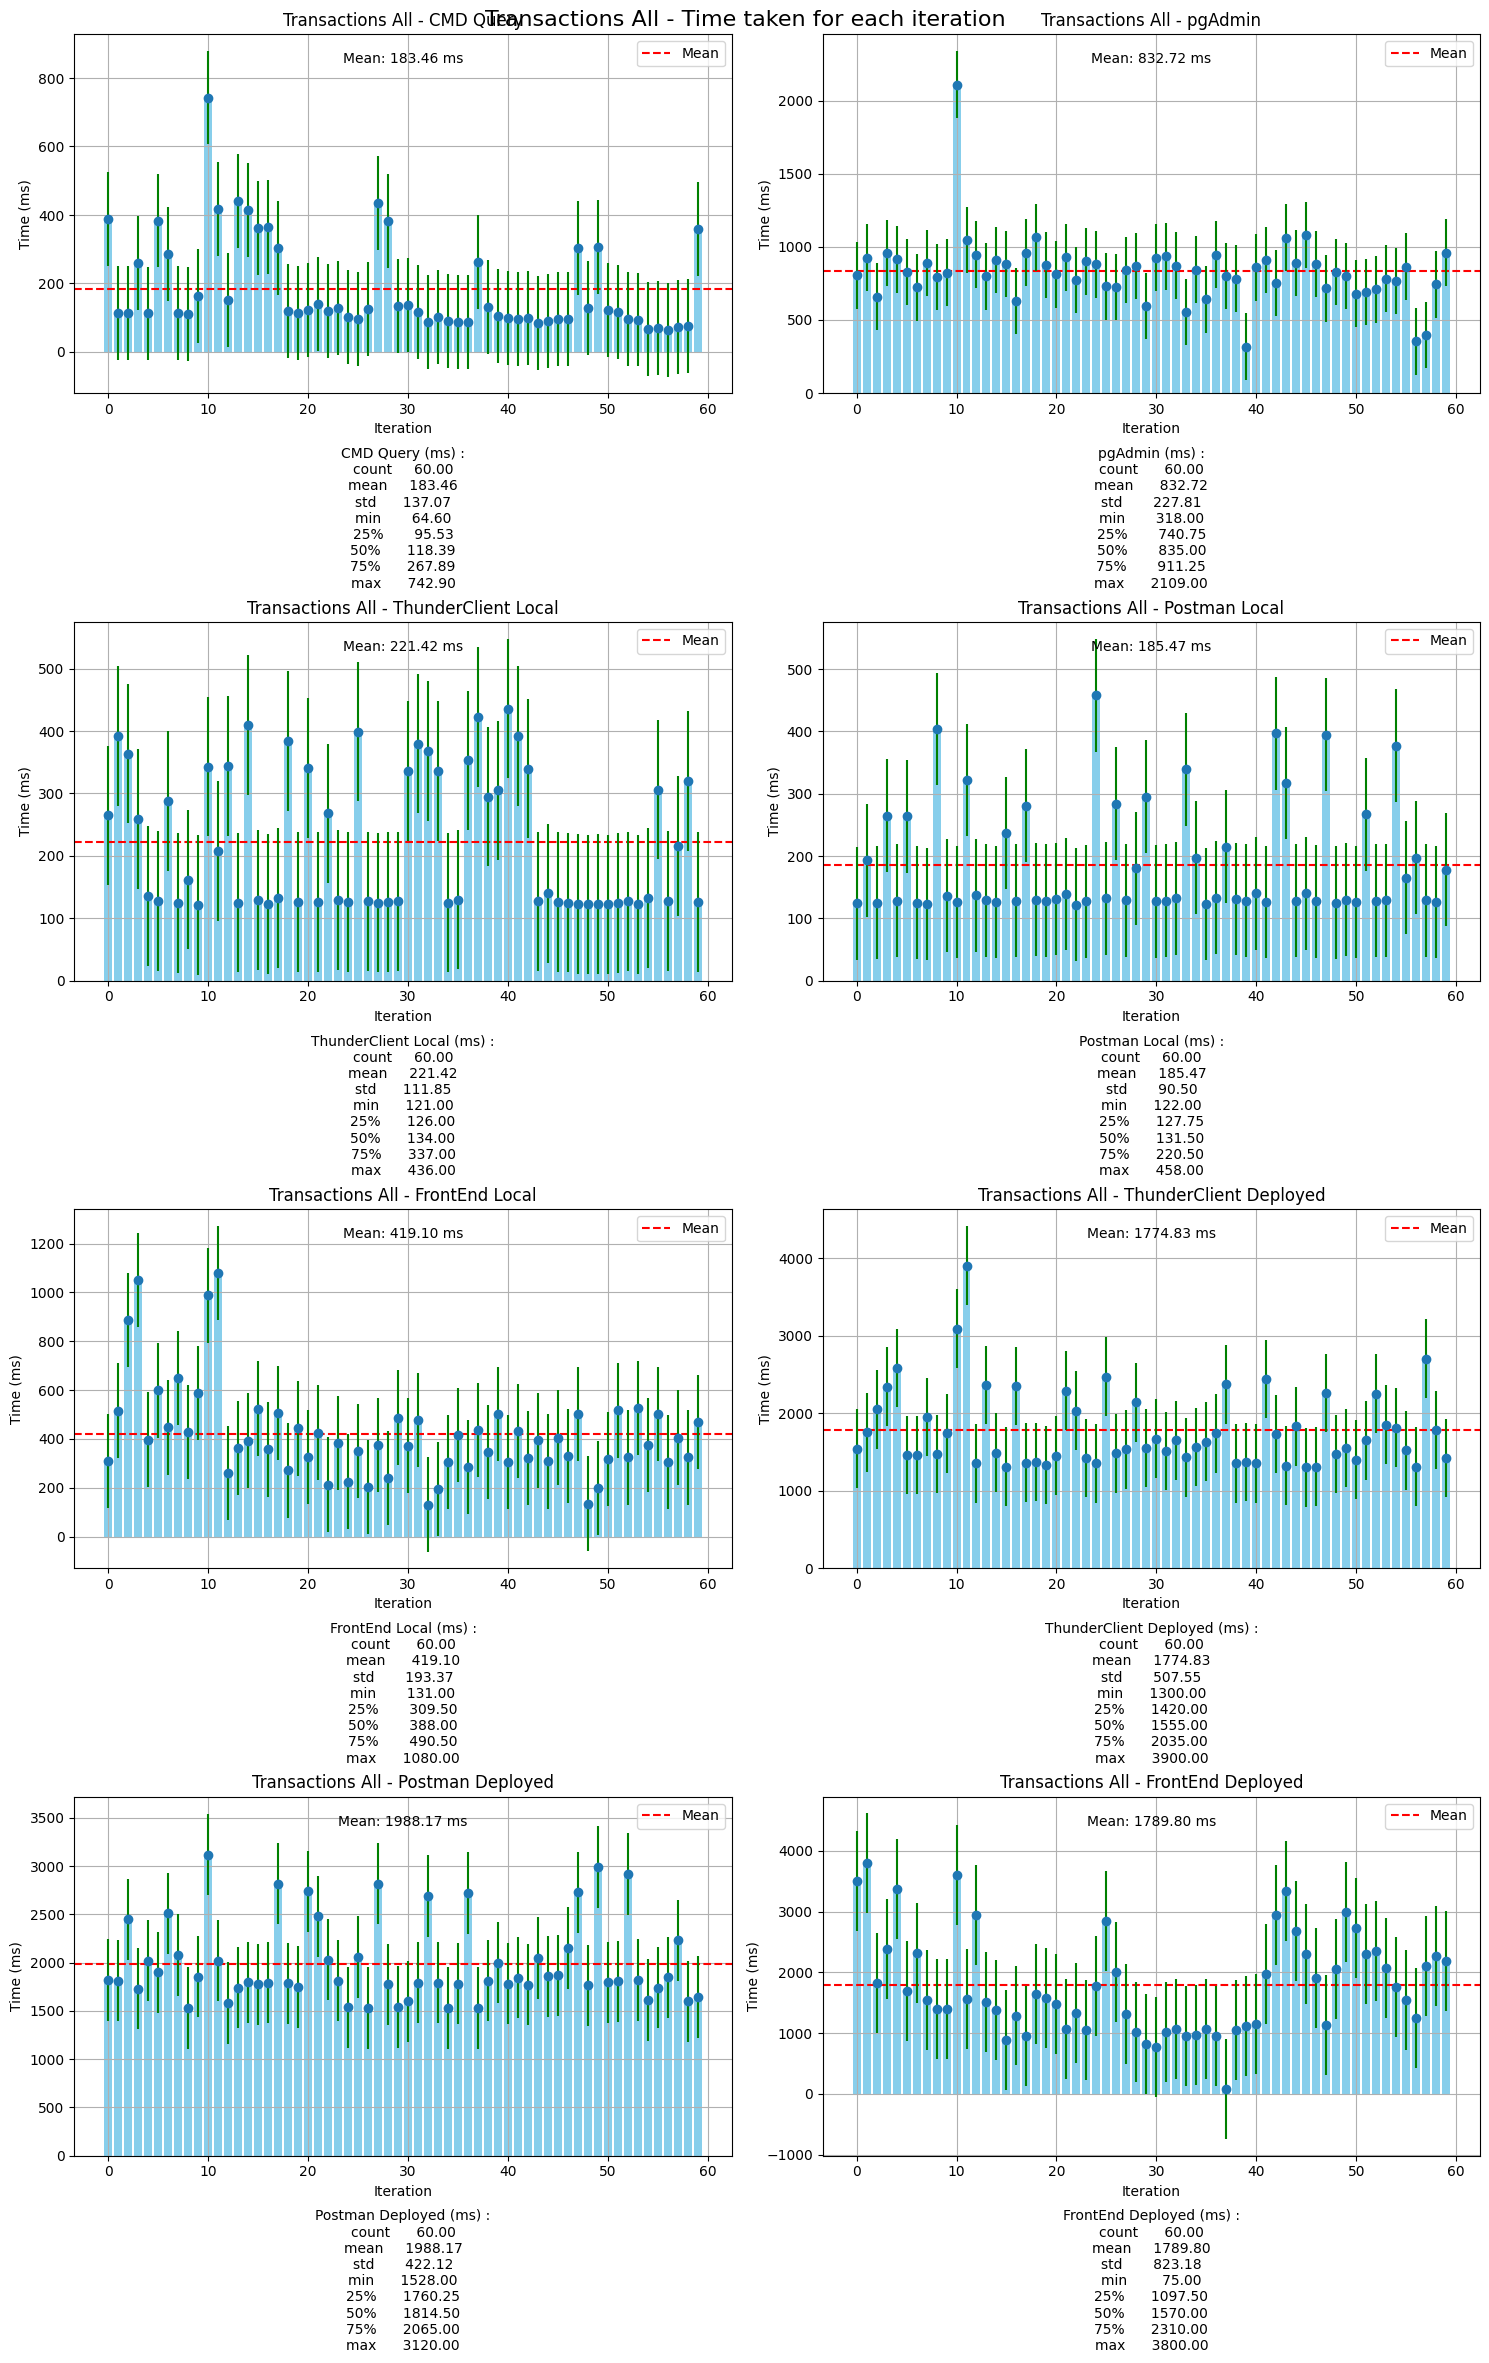

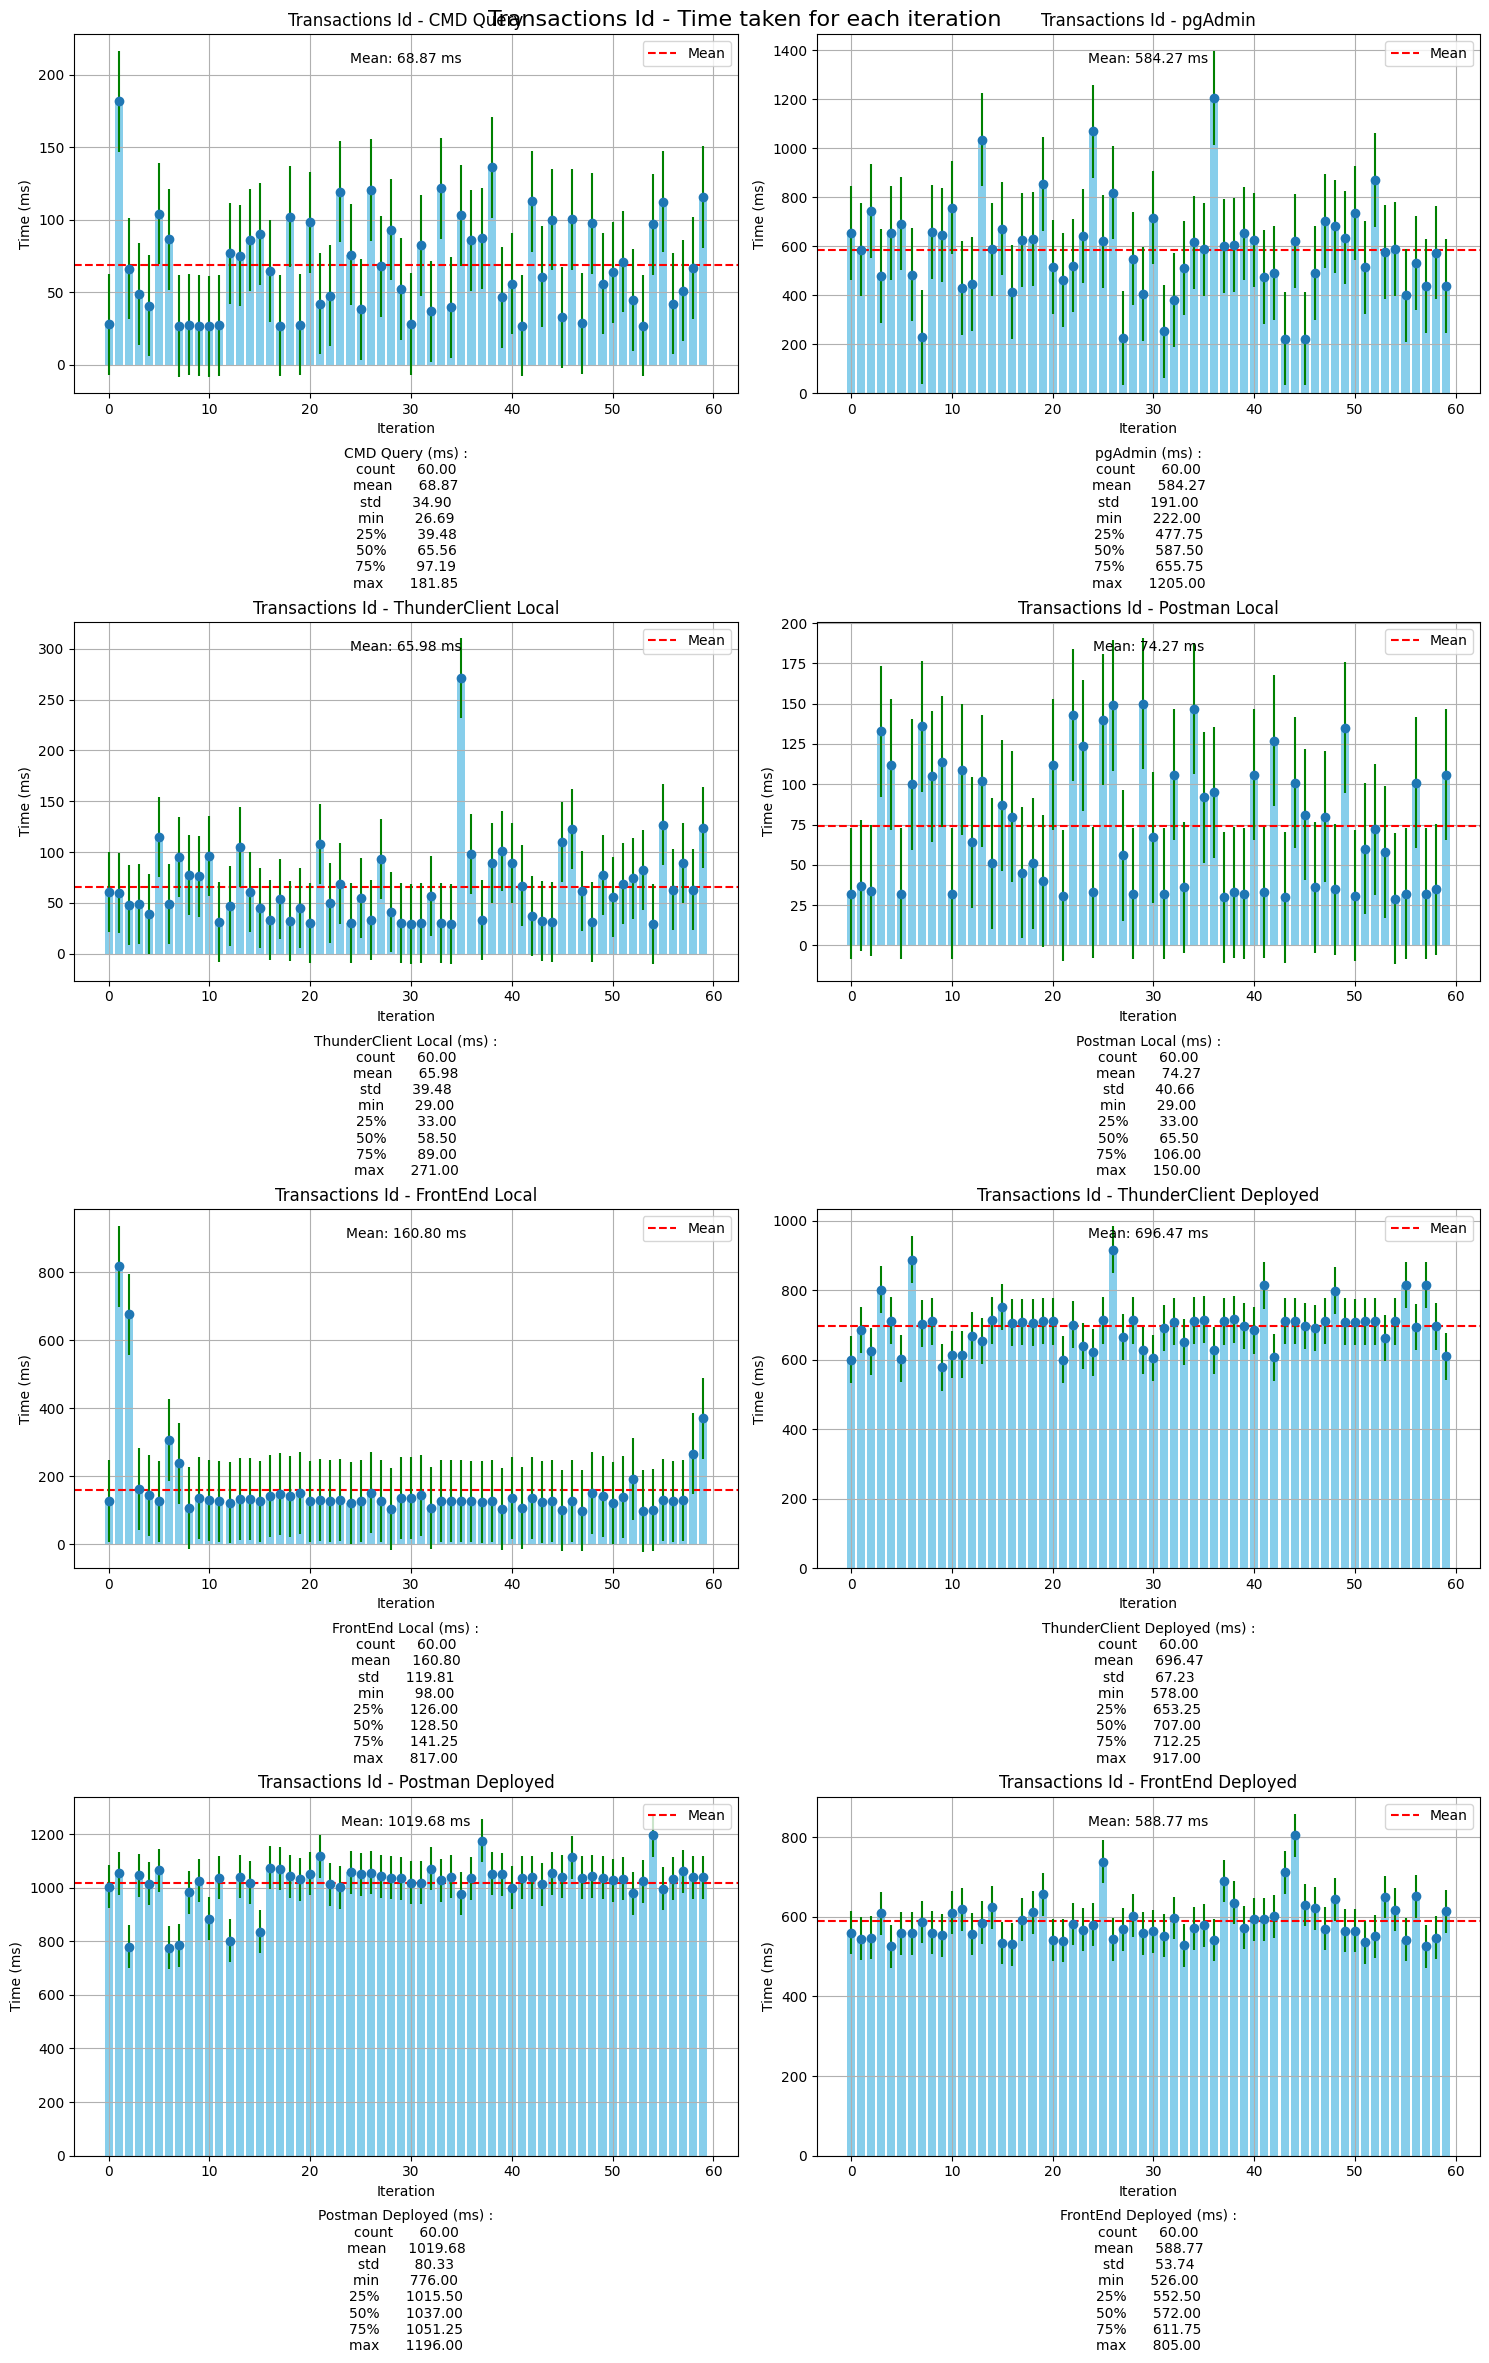

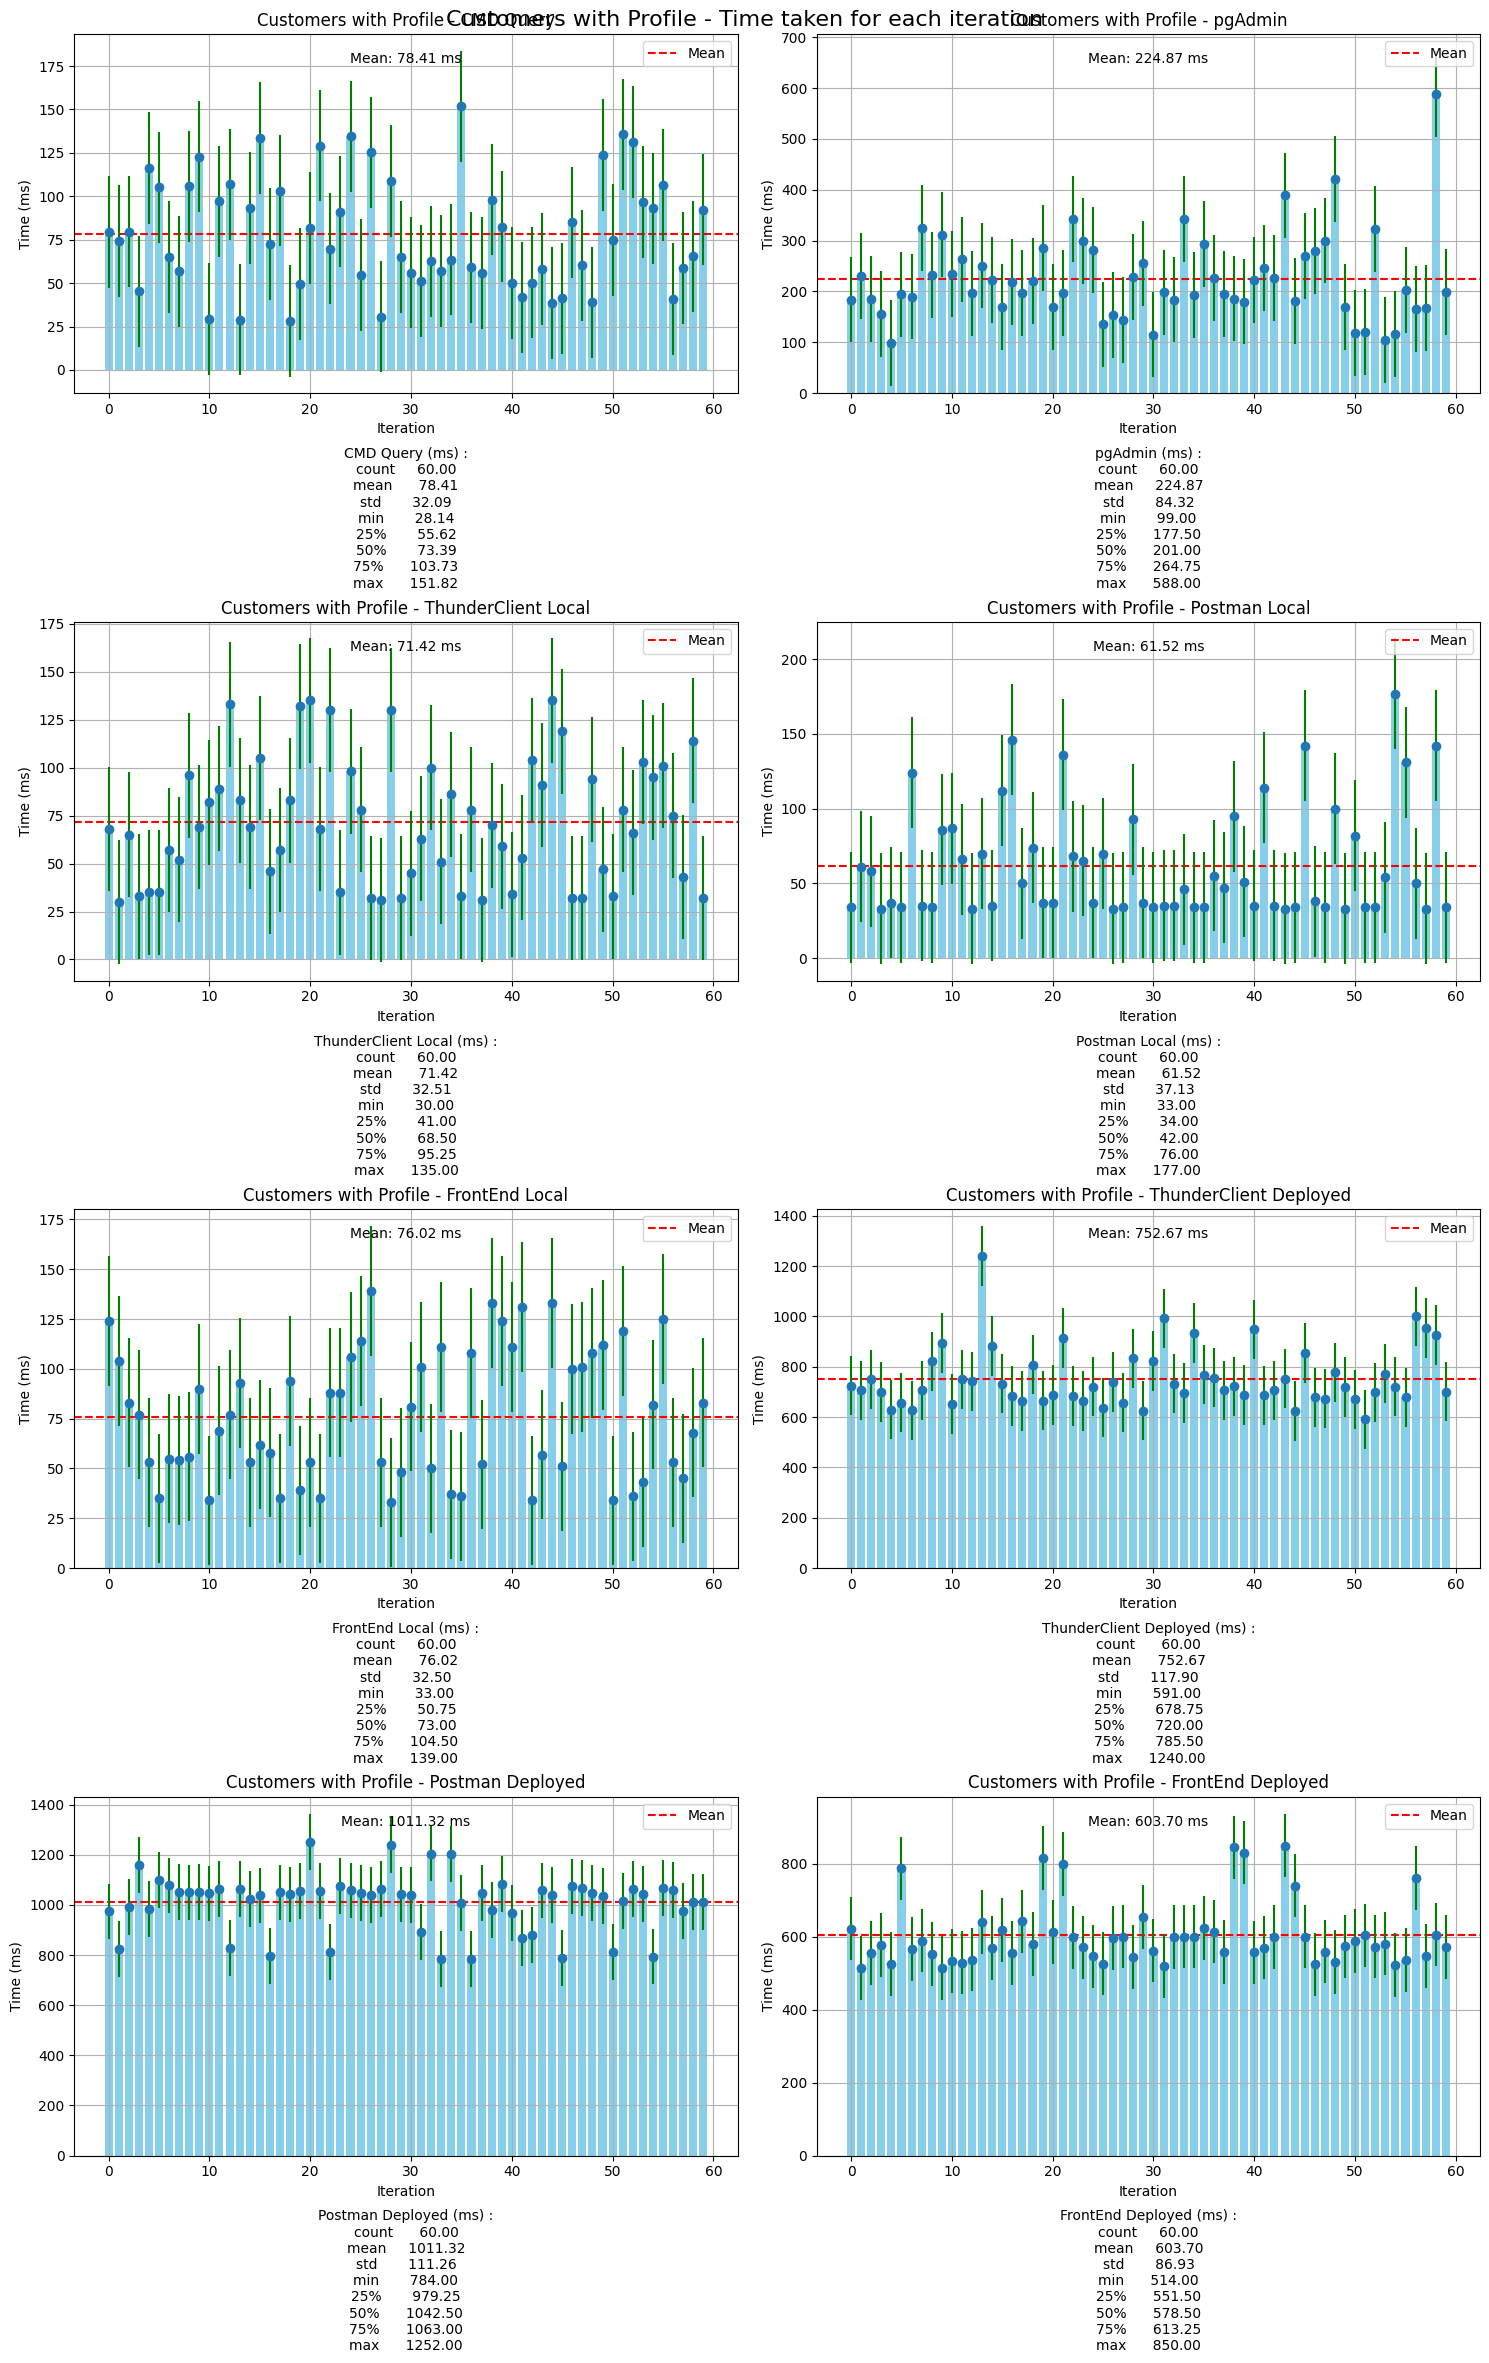

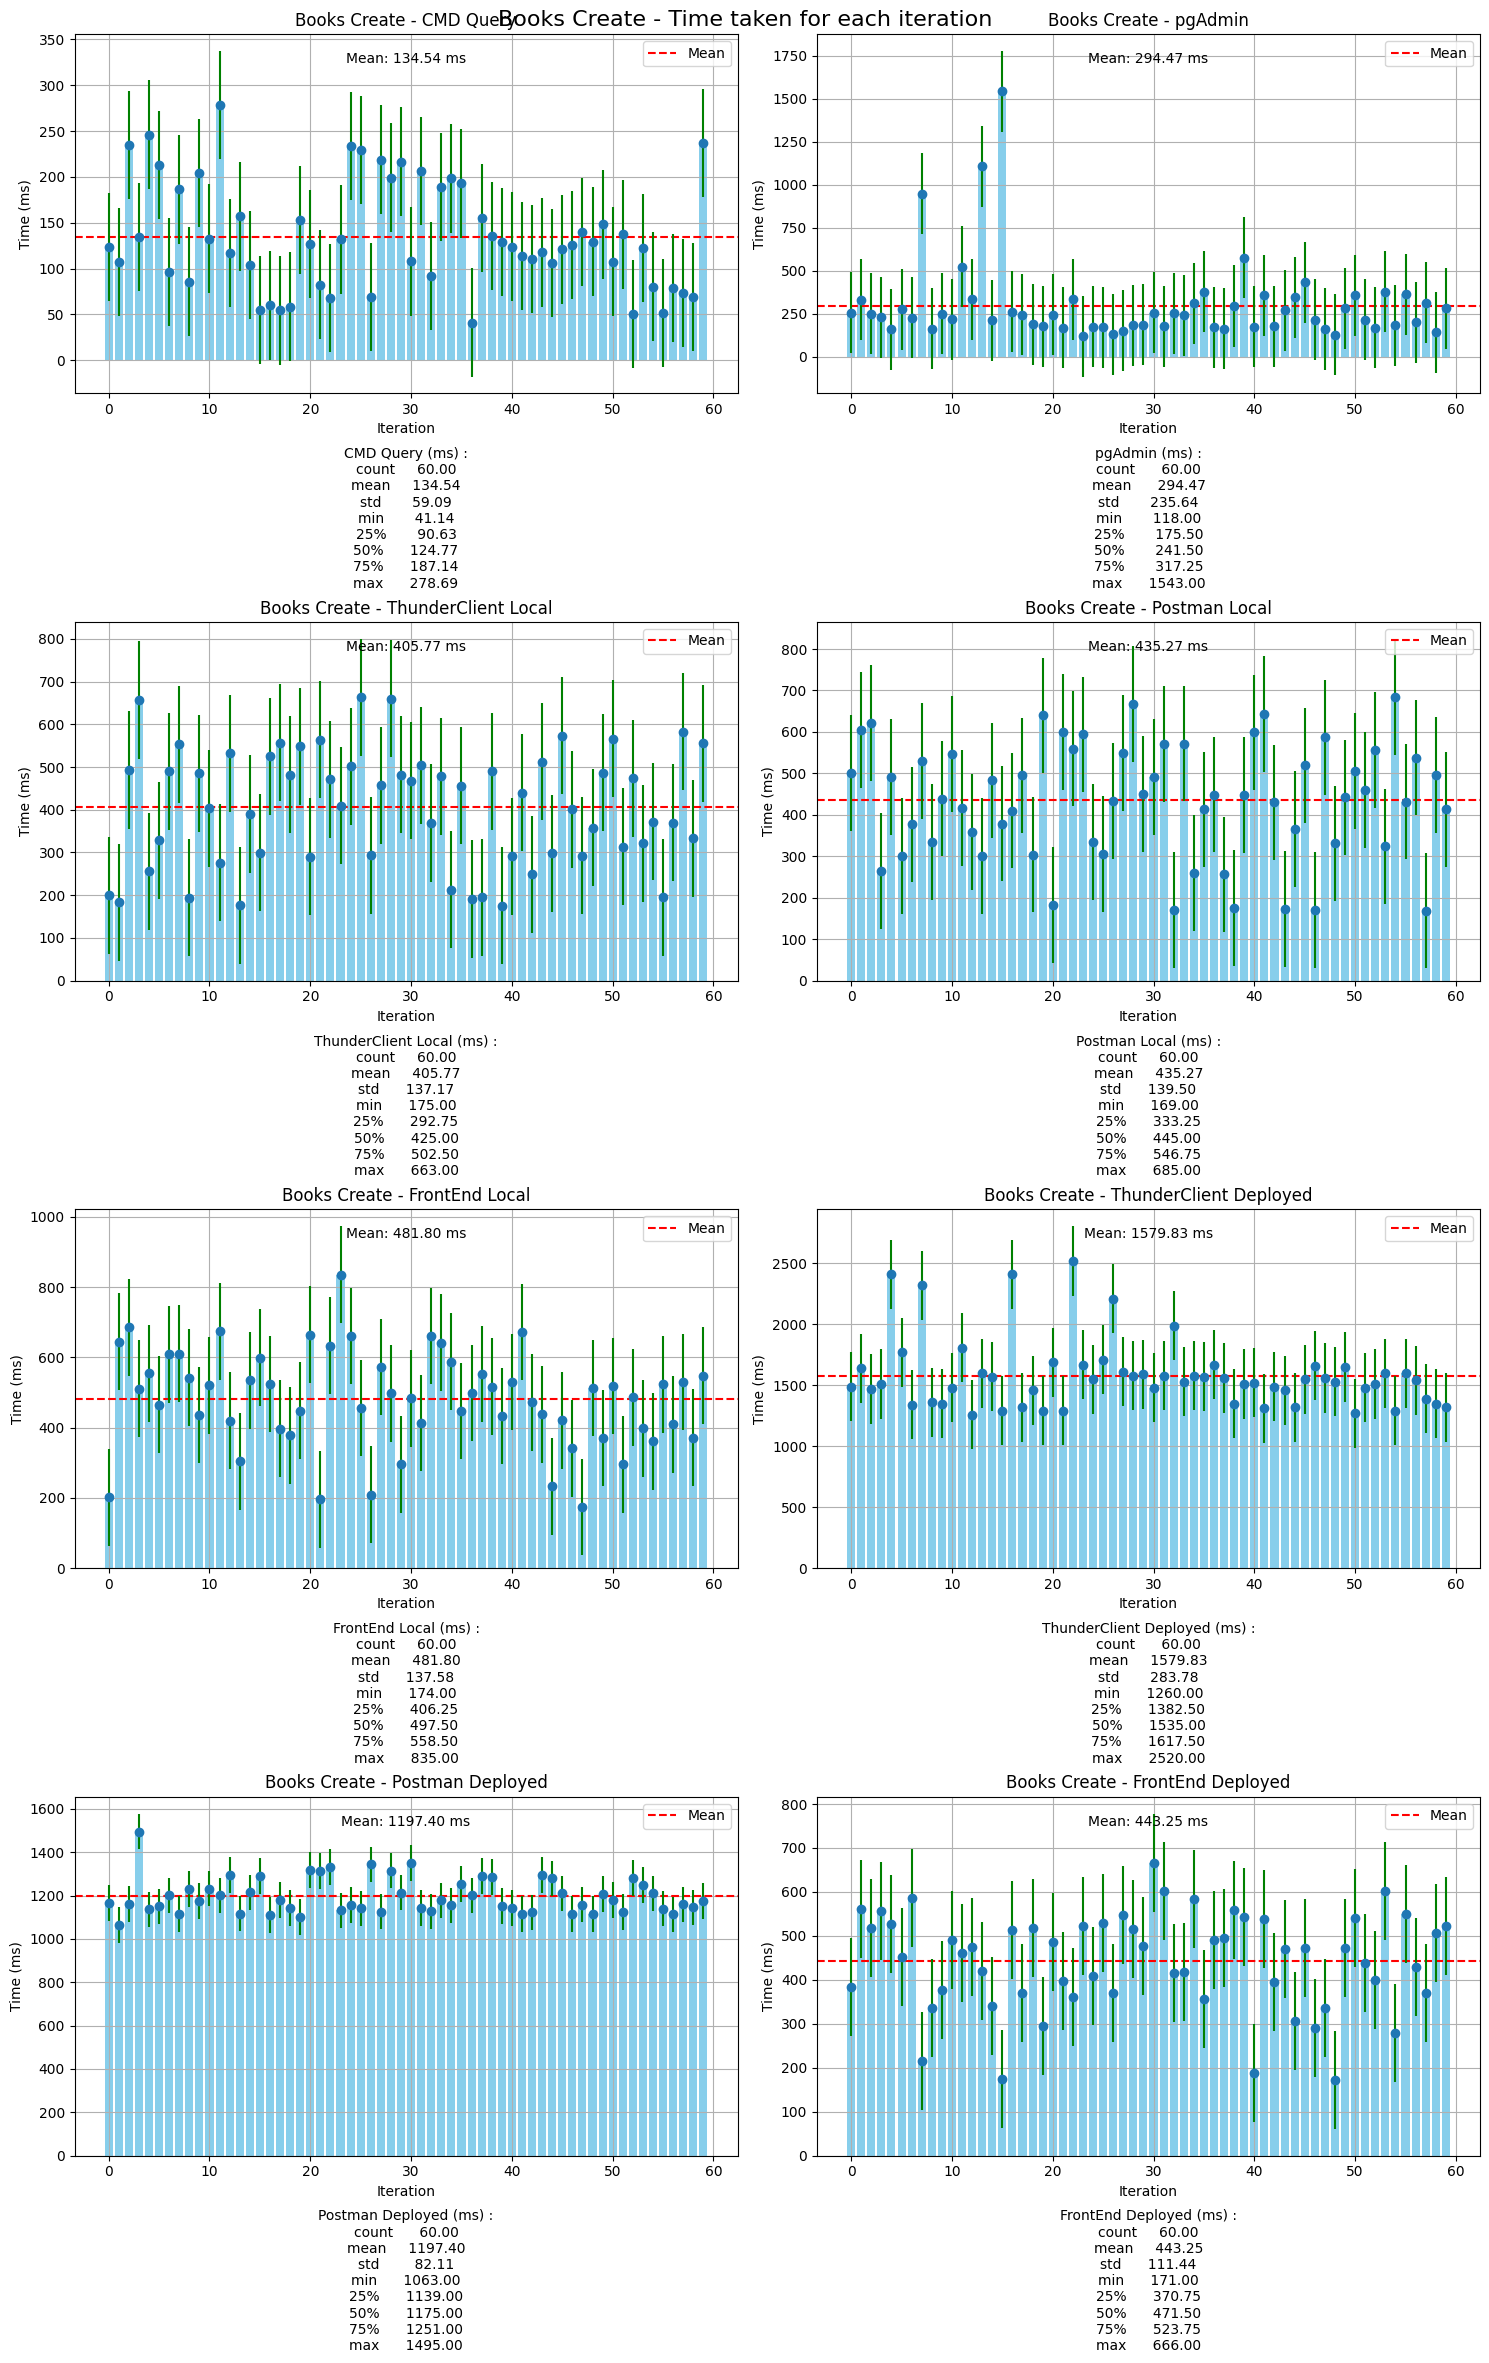

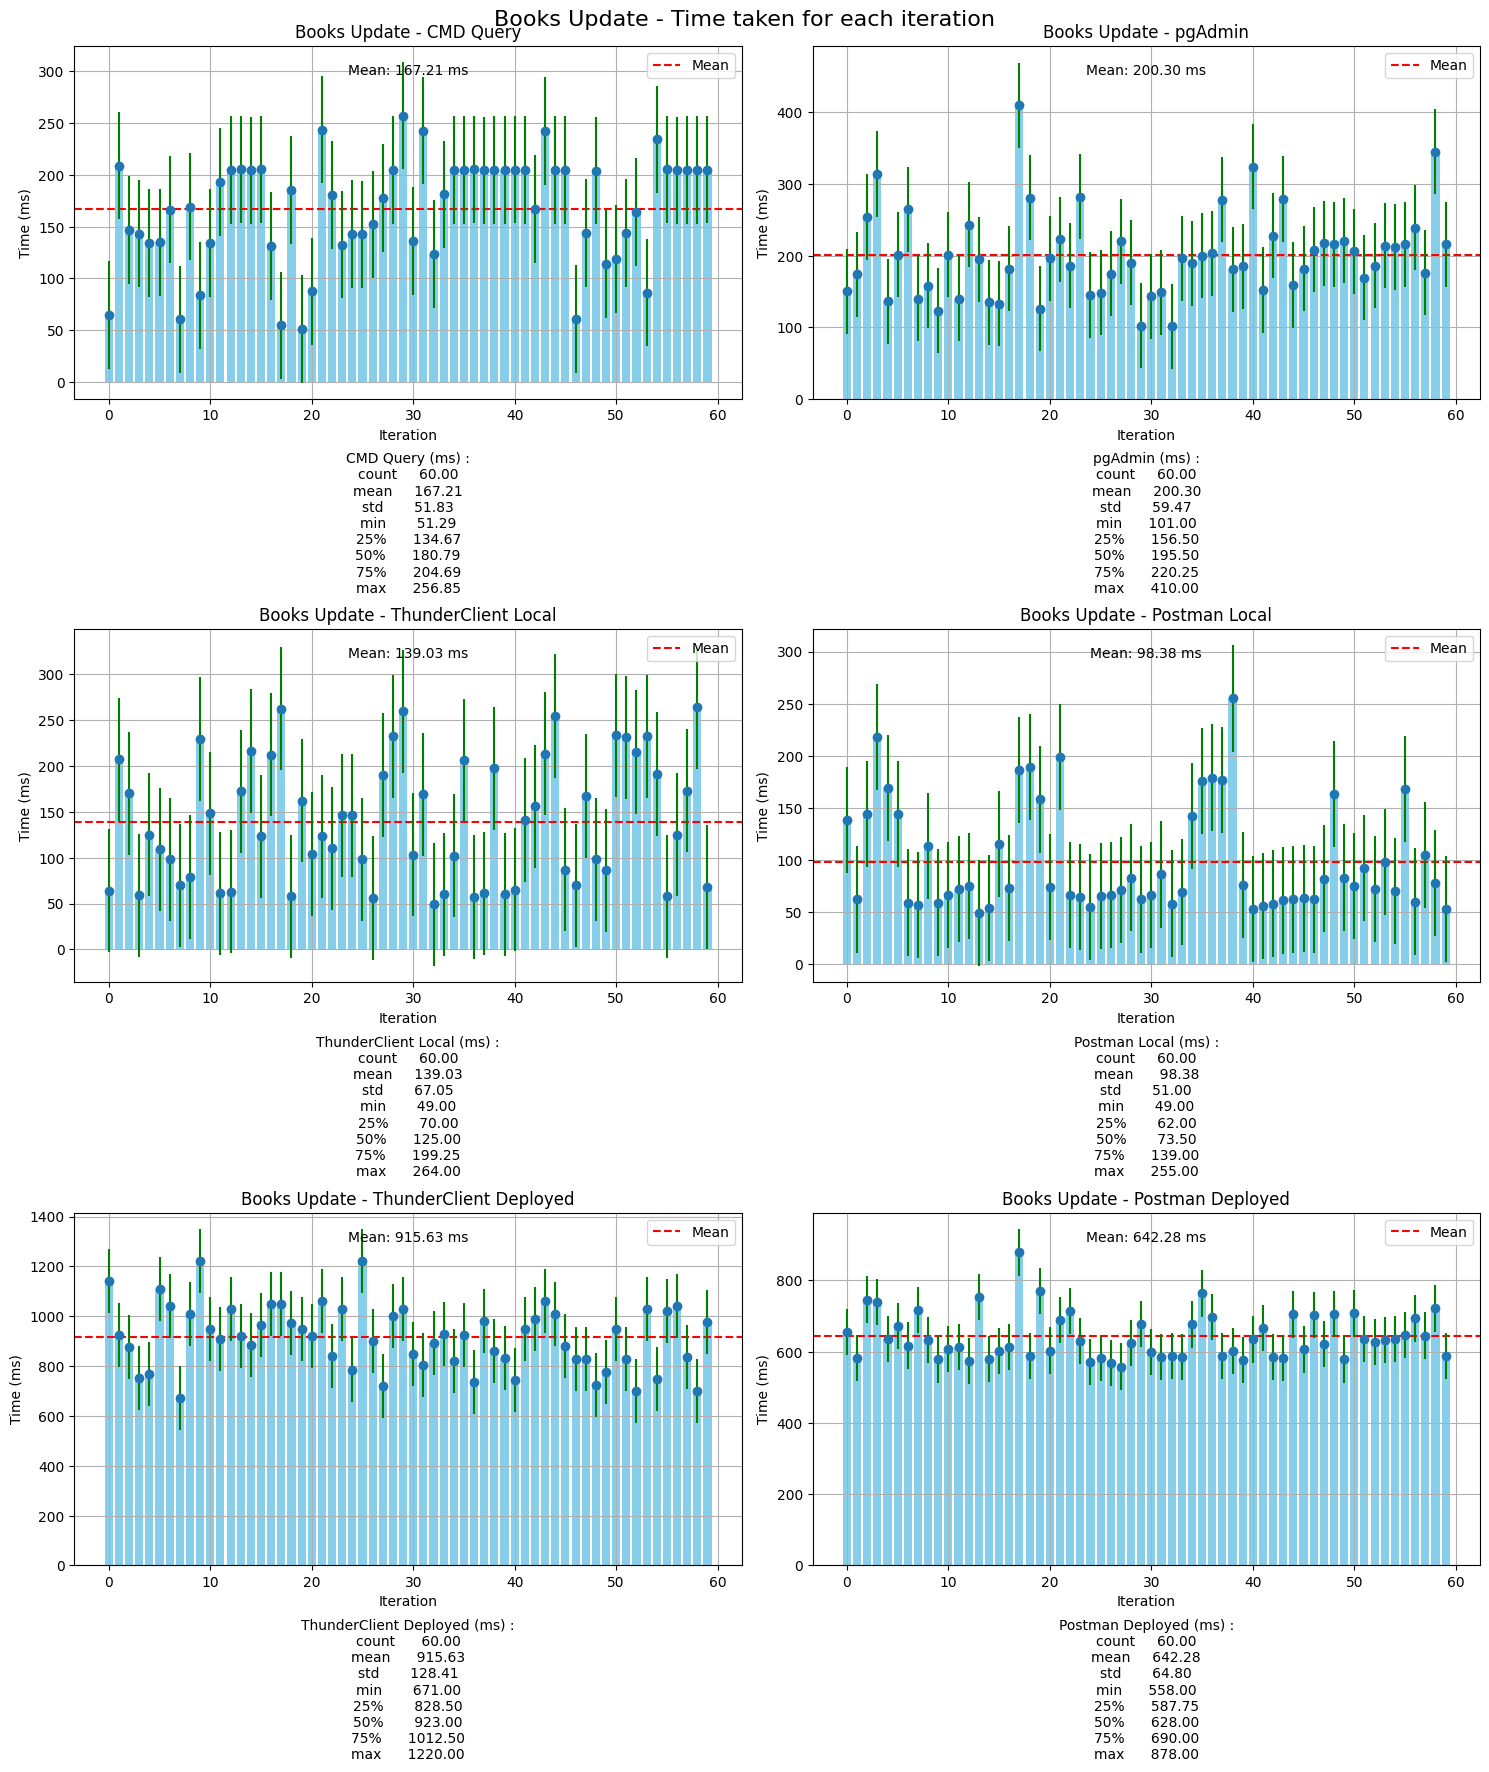

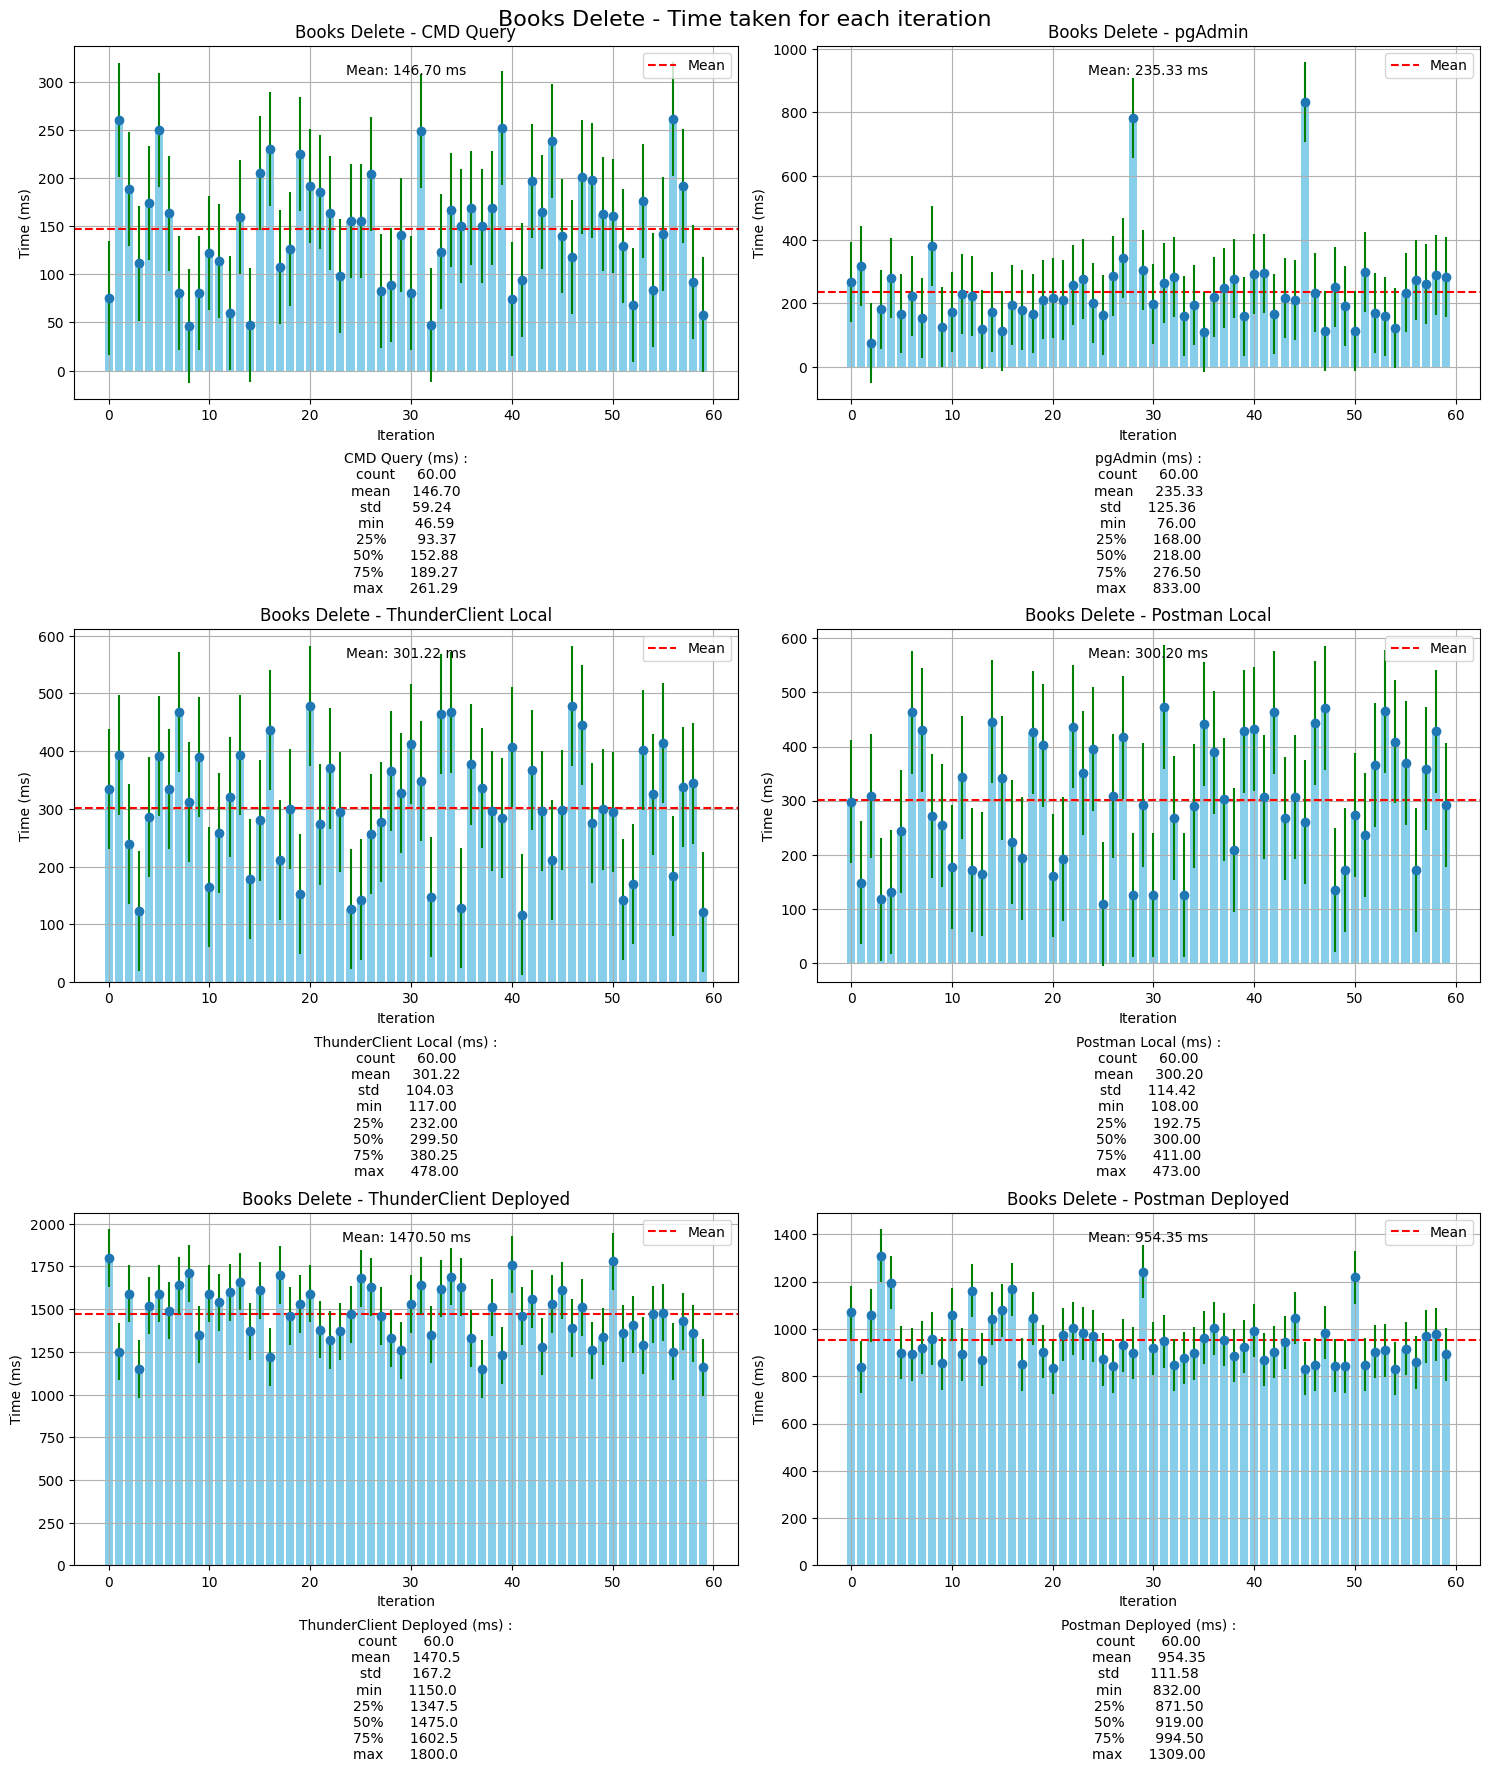

In [74]:
# Number of columns in the grid
num_cols = 2

# Loop through the DataFrame to print all the columns
for df in dfs:
    num_plots = len(df['df'].columns)
    num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the number of rows needed

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))
    axs = axs.flatten()  # Flatten the array to easily iterate over it

    # Draw title
    fig.suptitle(f'{df["name"]} - Time taken for each iteration', fontsize=16)

    for i, col in enumerate(df['df'].columns):
        description = df['df'][col].describe().round(2).to_string()  # Get description as string
        # convert the columns to float
        df['df'][col] = df['df'][col].astype(float)
        
        # Plotting the column data as bar chart
        axs[i].bar(df['df'].index, df['df'][col], color='skyblue')
        axs[i].set_xlabel('Iteration')
        axs[i].set_ylabel("Time (ms)")
        axs[i].set_title(f'{df["name"]} - {col}')
        axs[i].grid(True)
        
        # Add description as text in the bottom of the plot
        axs[i].text(0.5, -0.15, f'{col} (ms) :\n{description}', fontsize=10,
                    horizontalalignment='center', verticalalignment='top', transform=axs[i].transAxes)
        
        # Add a horizontal line at the mean value
        axs[i].axhline(df['df'][col].mean(), color='r', linestyle='--', label='Mean')
        axs[i].legend()
        
        # Show mean value
        axs[i].text(0.5, .95, f'Mean: {df["df"][col].mean():.2f} ms', fontsize=10,
                    horizontalalignment='center', verticalalignment='top', transform=axs[i].transAxes)
        
        # Show error bars
        axs[i].errorbar(df['df'].index, df['df'][col], yerr=df['df'][col].std(), fmt='o', ecolor='g', capthick=2)

    # Hide any unused subplots
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axs[j])

    # Adjust the space between subplots
    plt.subplots_adjust(hspace=0.6, wspace=0.4)

    plt.tight_layout()
    plt.show()
    
    # Download the plot as image
    fig.savefig(f'../docus/{df["name"]}_time_taken.png', bbox_inches='tight')

# Mean and Deviation Values

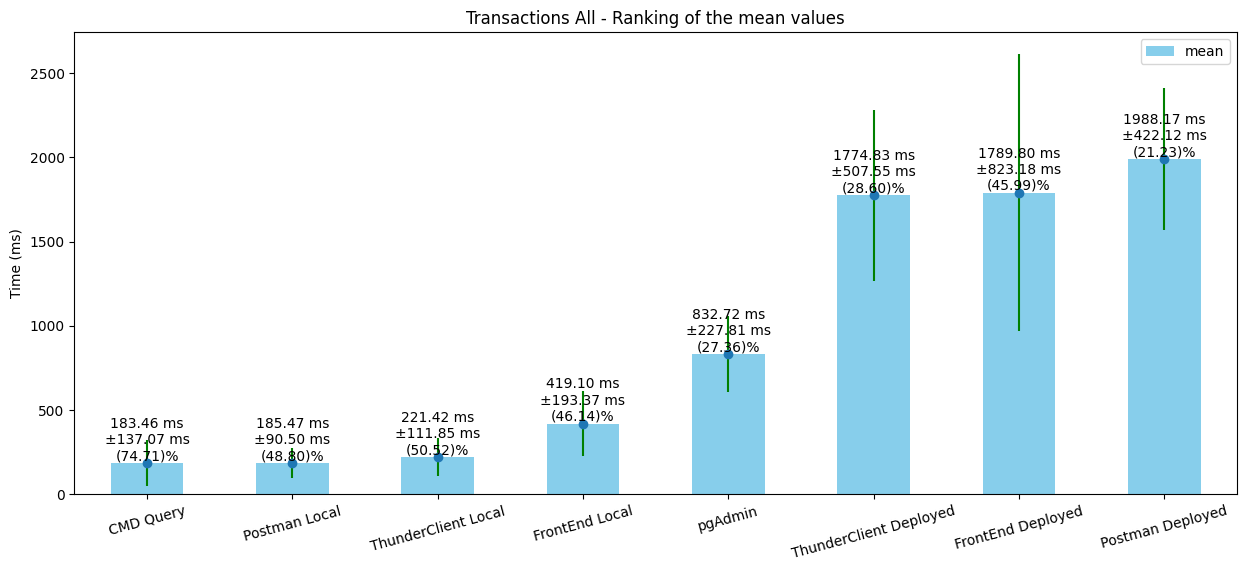

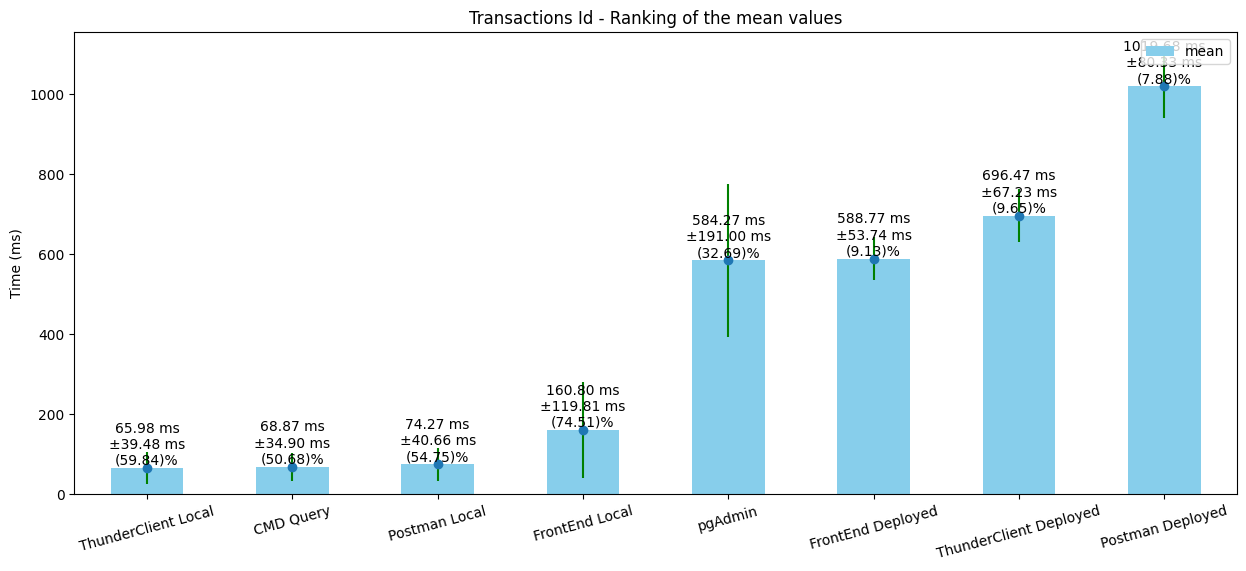

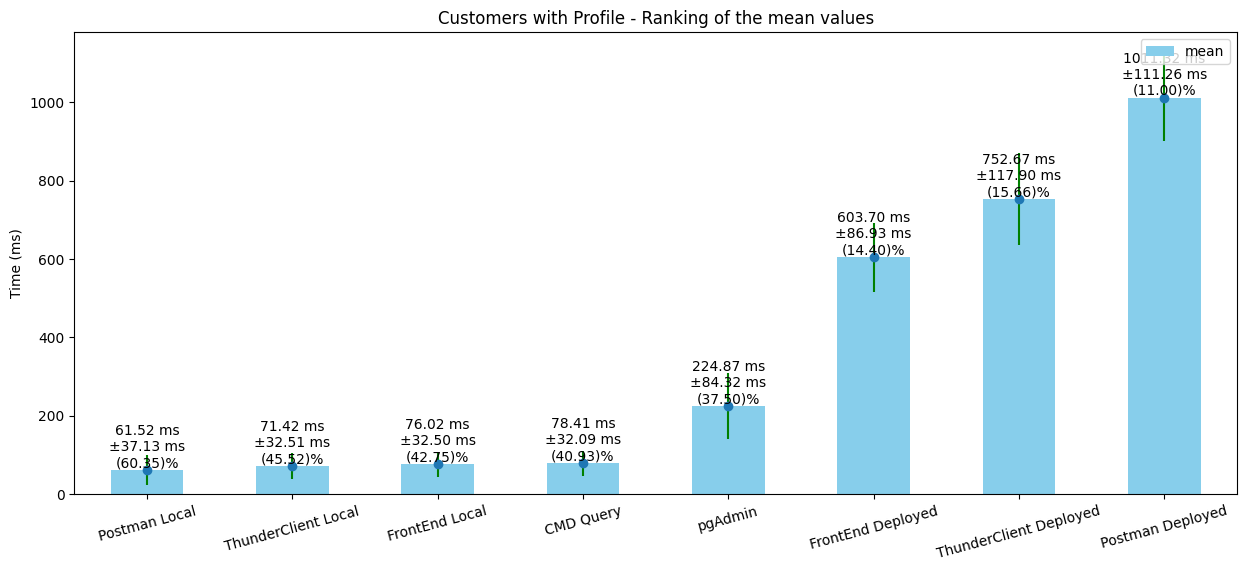

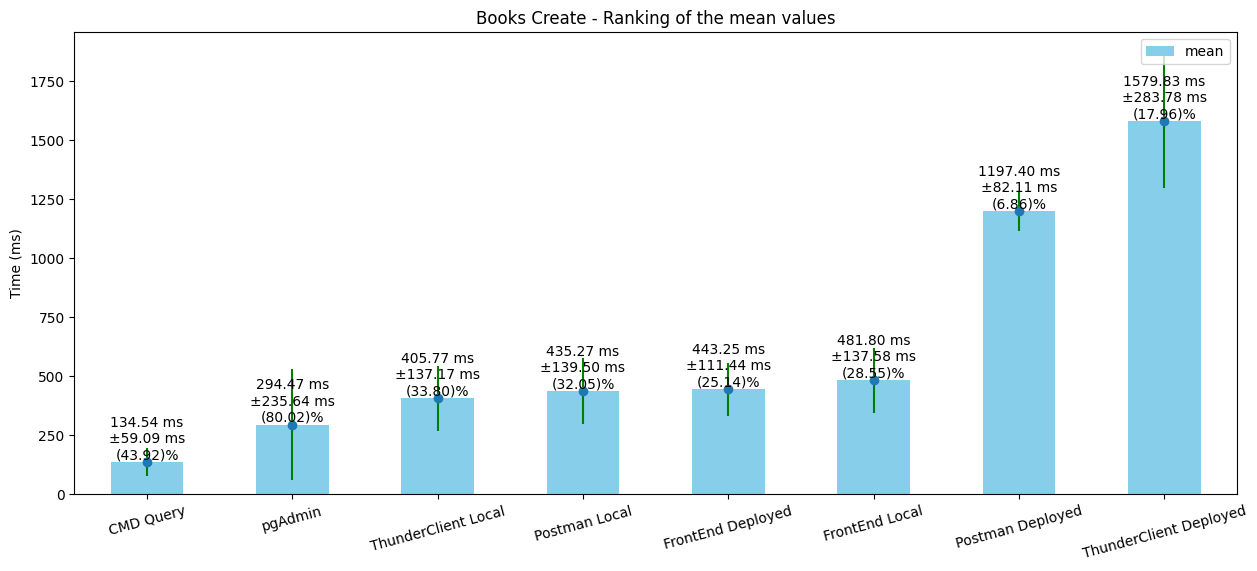

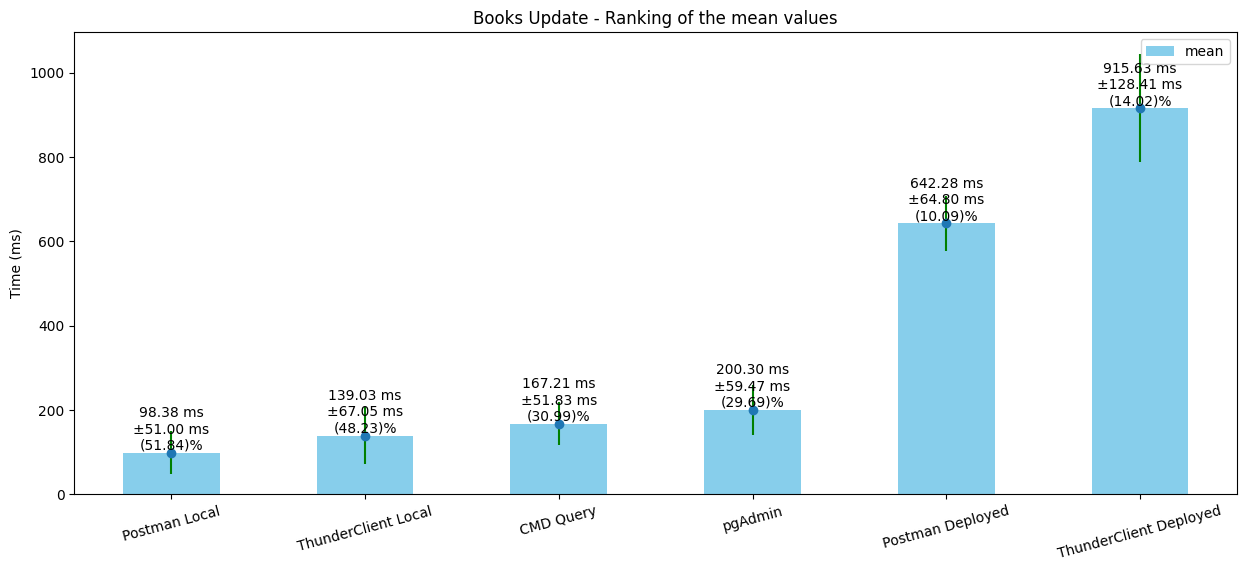

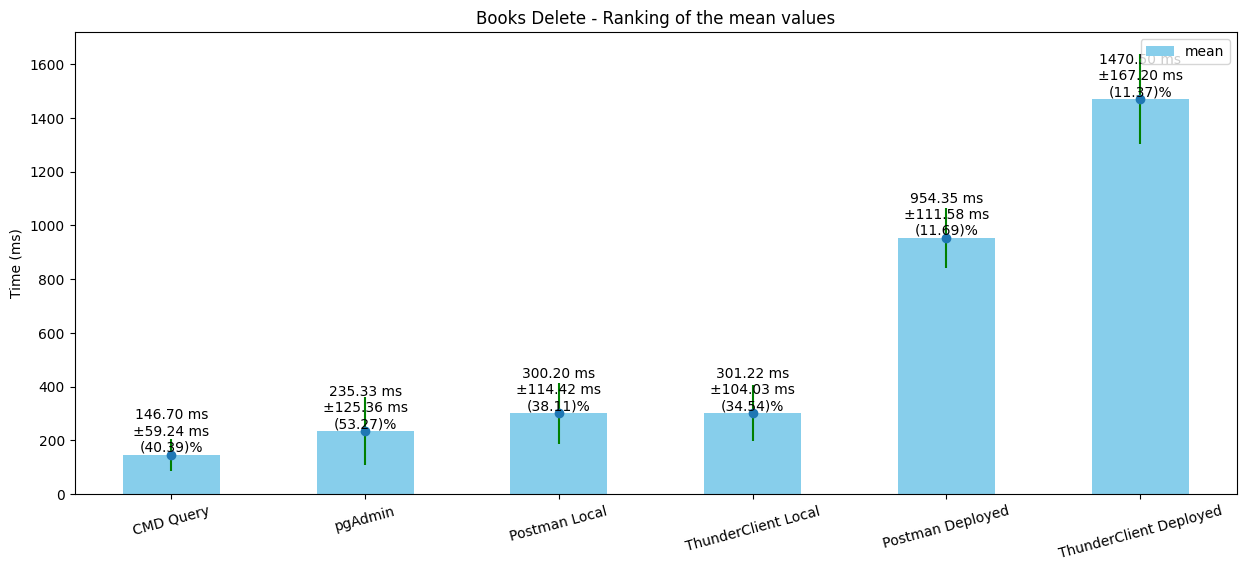

In [108]:
# Create ranking of the mean and values
for df in dfs:
    values = []
    for col in df['df'].columns:
        values.append({
            'name': df['name'],
            'column': col,
            'mean': df['df'][col].mean(),
            'deviation': df['df'][col].std()
        })
        
    # Plot the ranking
    values_df = pd.DataFrame(values)
    values_df = values_df.sort_values(by='mean', ascending=True)
    
    values_df.plot(kind='bar', x='column', y='mean', figsize=(15, 6), color='skyblue')
    
    # Add deviation as error bars
    plt.errorbar(np.arange(len(values_df['column'])), values_df['mean'], yerr=values_df['deviation'], fmt='o', ecolor='g', capthick=2)
    
    # Name the x-axis with each API vertically
    plt.xticks(np.arange(len(values_df['column'])), values_df['column'], rotation=15)
    plt.title(f'{df["name"]} - Ranking of the mean values')

    # show values on top of the bars vertically with percentage deviation to the mean
    for i, v in enumerate(values_df['mean']):
        plt.text(i, v + 0.1, f'{v:.2f} ms\n±{values_df.iloc[i]["deviation"]:.2f} ms\n({values_df.iloc[i]["deviation"] / v * 100  :.2f})%', ha='center', va='bottom', rotation=0)

    plt.ylabel('Time (ms)')
    plt.xlabel('')
    plt.show()
    
    # Download the plot as image
    plt.savefig(f'{df["name"]}_ranking.png')
